In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
df = pd.read_csv('CleanedSeattleData.csv')

# Example features and labels

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]  # your features
y = df['INJURY_BINARY'] = df['SEVERITYCODE'].apply(lambda x: 1 if x > 1 else 0)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='rbf')  # You can change the kernel and other parameters
clf.fit(X_train, y_train)


SVC()

In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test data
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.657201686439847
              precision    recall  f1-score   support

           0       0.66      0.99      0.79     33468
           1       0.54      0.02      0.04     17527

    accuracy                           0.66     50995
   macro avg       0.60      0.51      0.41     50995
weighted avg       0.62      0.66      0.53     50995



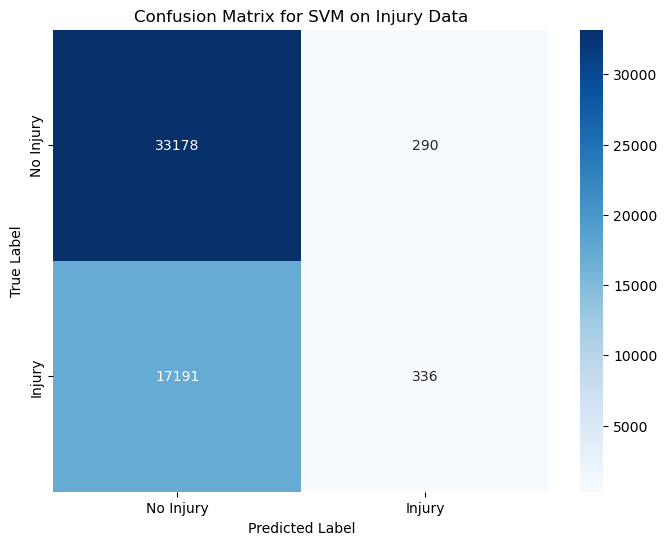

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix for SVM on Injury Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()